In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta
import os
import datetime
import json
import seaborn as sns
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbt as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from week_corr_v1 import get_data,Strategy
sns.set_style("darkgrid")

../..\vectorbtpro\accessors.py:188: UserWarning: registration of accessor <class 'vectorbtpro.accessors.Vbt_SRAccessor'> under name 'vbt' for type <class 'pandas.core.series.Series'> is overriding a preexisting attribute with the same name.
  class Vbt_SRAccessor(DirNamesMixin, GenericSRAccessor):
../..\vectorbtpro\accessors.py:208: UserWarning: registration of accessor <class 'vectorbtpro.accessors.Vbt_DFAccessor'> under name 'vbt' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class Vbt_DFAccessor(DirNamesMixin, GenericDFAccessor):


In [2]:
df_dict = {}
candidate = ['BTC','ETH','SOL','XRP']

for coin in candidate:
    df_dict[coin] = get_data(coin)

APY: 88.91 %
MDD: 34.08 %
MDD Duration 147 days 03:00:00
worst trade: -15.90 %
2023-06-18 00:00:00 ~ 2023-06-23 22:00:00
avg holding days: 4.35 days
--------------------------------------------
PF: 1.88
Sharpe Ratio: 1.58
Calmar Ratio: 1.96
Sortino Ratio: 2.31
Omega Ratio: 1.07
--------------------------------------------
Expectancy : 1.31 %
Total Time Exposure : 81.03 %
Total Trades: 135
Win Rate: 50.00 %
--------------------------------------------
PF * Win Rate: 0.940


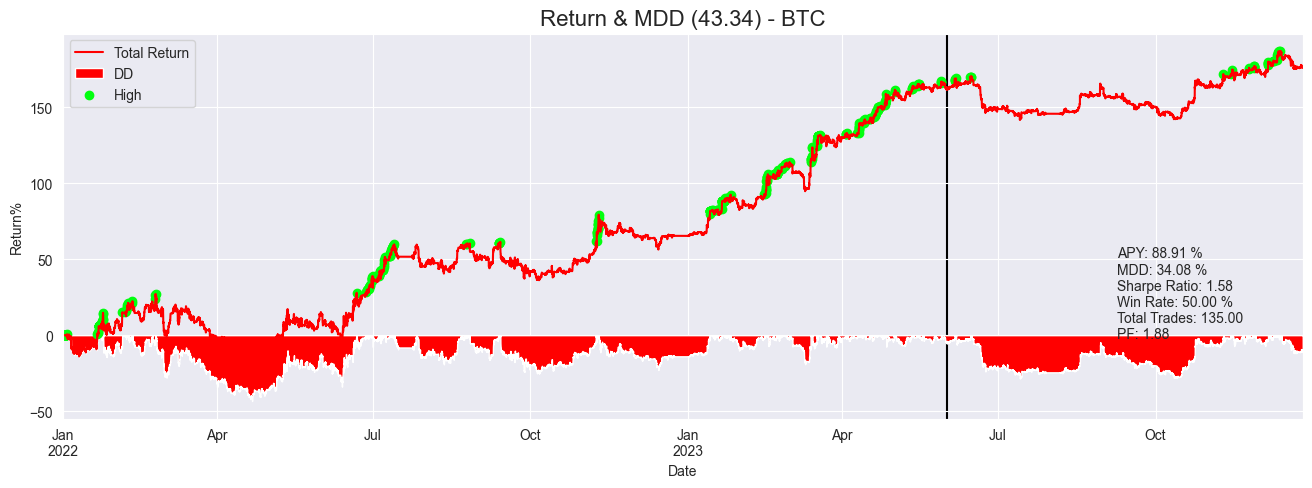

In [6]:
start = '2022-01-01'
sep = ''
end = ''

side = 'both'
params = {'vol_threshold': 4, 'ret_threshold': 0.15, 'date': 1}
# params = {'vol_threshold': 2.5, 'ret_threshold': 0.15, 'date': 5}

config = {'freq':'1h', 'lag':1, 'fee': 0.0003}
coin = 'BTC'
df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
value = analyze.show_pf_analysis(params, side, coin, axv_index=['2023-06-01'])

In [4]:
start= '2022-01-01'
end ='2023-06-01'

params={
    'vol_threshold': [0.0, 5, .5],
    'ret_threshold' : [0.1, 0.5, 0.05],
    'date':[5,6,1]
    }
    
config = {'freq':'1h','fee': 0.0003}
symbol_list = ['BTC']
sample_sets = [[start,end]]

multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    config=config,
    df_dict=df_dict,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

======================= BTC BOTH Optimize Test =======================
Optimization trails: 80


100%|██████████| 80/80 [01:53<00:00,  1.42s/it]


Optimization time: 113.51 sec
---------- BTC BOTH ----------
{'vol_threshold': 2.5, 'ret_threshold': 0.15000000000000002, 'date': 5}
APY: 114.66 %
MDD: 34.08 %
MDD Duration 117 days 07:00:00
worst trade: -11.82 %
2022-01-03 00:00:00 ~ 2022-01-07 22:00:00
avg holding days: 4.37 days
--------------------------------------------
PF: 2.10
Sharpe Ratio: 1.81
Calmar Ratio: 2.86
Sortino Ratio: 2.65
Omega Ratio: 1.07
--------------------------------------------
Expectancy : 1.71 %
Total Time Exposure : 81.06 %
Total Trades: 96
Win Rate: 51.58 %
--------------------------------------------
PF * Win Rate: 1.082


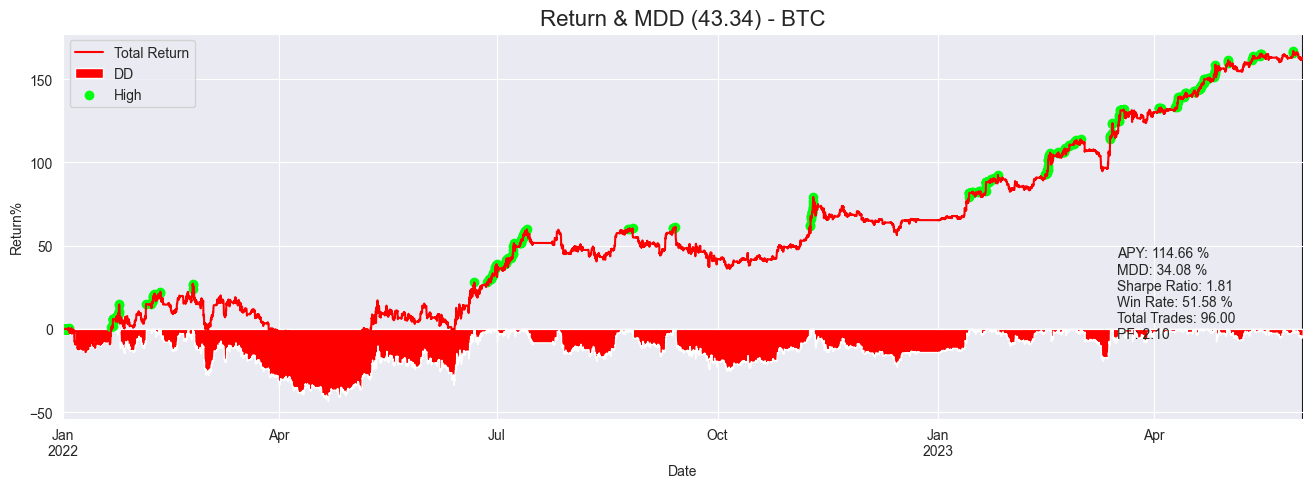

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     -1.12 | 3936.55 | -4229.02 |       0.93 |   44.44 |         18 |
| 2022-06    |     41.87 | 7083.1  | -3158.11 |       2.24 |   52.63 |         19 |
| 2022-09    |      5.57 | 3947.37 | -3390.05 |       1.16 |   35.29 |         17 |
| 2022-12    |     23.47 | 3572.28 | -1225    |       2.92 |   64.29 |         14 |
| 2023-03    |     64.9  | 9144.25 | -2654.19 |       3.45 |   52.63 |         19 |
| 2023-06    |     31.82 | 3435.85 |  -253.72 |      13.54 |   66.67 |          9 |
+------------+-----------+---------+----------+------------+---------+------------+


In [5]:
all_params = multi_test.multi_params(symbol_list,sample_sets,direction='both')
trades, value_df = multi_test.multi_params_result(all_params)
# multi_test.save_version_result(all_params,value_df,trades,1)